In [175]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.2.0


In [176]:
digit = tf.keras.datasets.mnist

In [177]:
(X_train,y_train),(X_test,y_test)=digit.load_data()

In [178]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


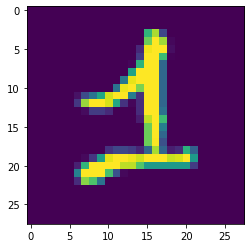

In [179]:
plt.figure()
plt.imshow(X_train[24])

In [180]:
X_train = X_train/250
X_test = X_test/250

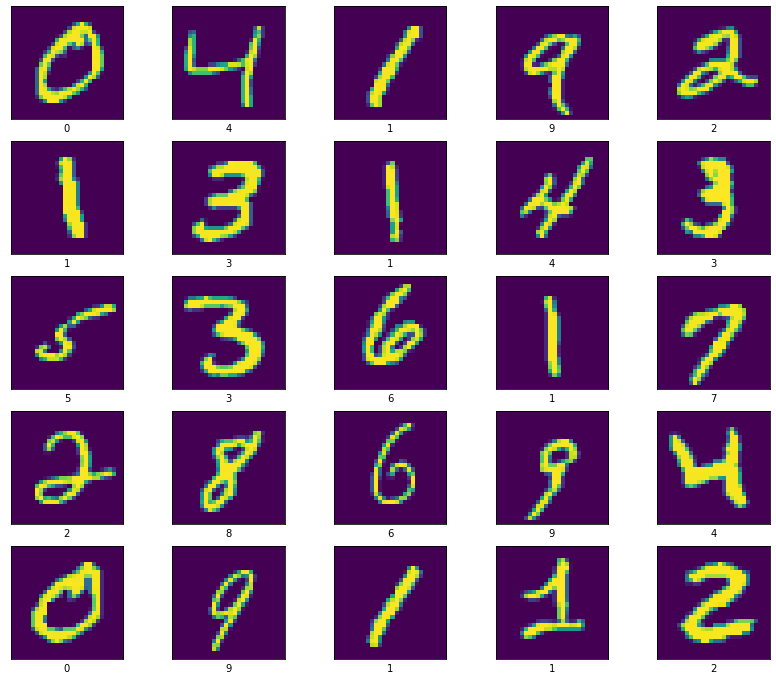

In [182]:
plt.figure(figsize=(14,12))
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
    plt.xticks([])
    plt.yticks([])

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Flatten

In [184]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [185]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics='accuracy')

In [186]:
earlystop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

In [187]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,callbacks=[earlystop],epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3143 - accuracy: 0.9034 - val_loss: 0.1359 - val_accuracy: 0.9554
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1176 - accuracy: 0.9644 - val_loss: 0.1148 - val_accuracy: 0.9637
Epoch 3/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0831 - accuracy: 0.9739 - val_loss: 0.1231 - val_accuracy: 0.9608
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0640 - accuracy: 0.9796 - val_loss: 0.0893 - val_accuracy: 0.9730
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 0.0903 - val_accuracy: 0.9733
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0476 - accuracy: 0.9848 - val_loss: 0.0937 - val_accuracy: 0.9719
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0924 - val_accuracy: 0.9744
Epoch 

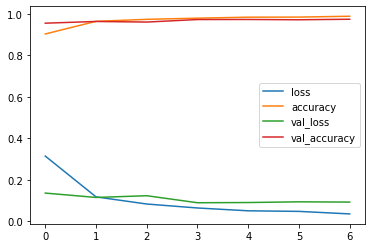

In [188]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [189]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0924 - accuracy: 0.9744


[0.09240389615297318, 0.974399983882904]